<a href="https://colab.research.google.com/github/DaffaHamsy/UTS-SIstem-Cerdas/blob/main/soal_UTS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.8542857142857145


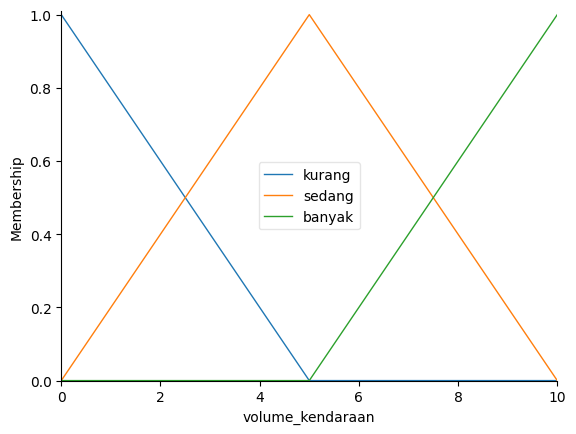

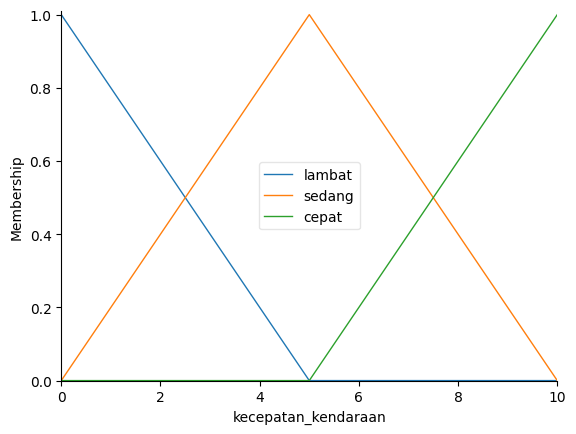

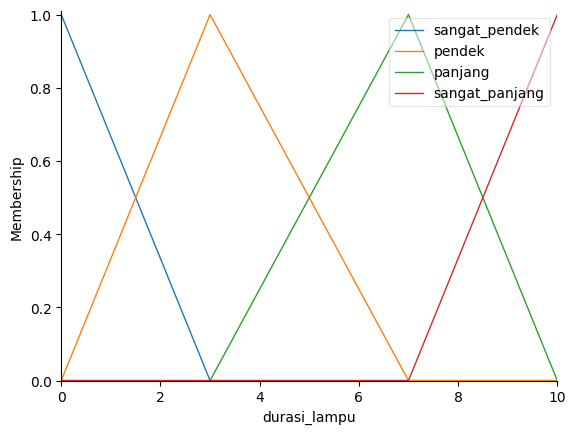

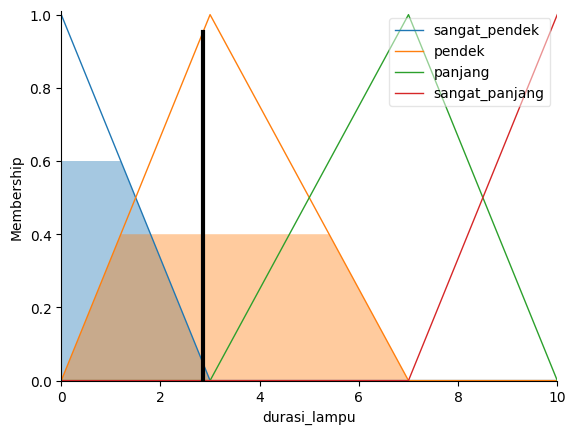

In [7]:
# Import library yang dibutuhkan
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Inisialisasi variabel input dan output
volume_kendaraan = ctrl.Antecedent(np.arange(0, 11, 1), 'volume_kendaraan')
kecepatan_kendaraan = ctrl.Antecedent(np.arange(0, 11, 1), 'kecepatan_kendaraan')
durasi_lampu = ctrl.Consequent(np.arange(0, 11, 1), 'durasi_lampu')

# Fungsi keanggotaan untuk variabel input dan output
volume_kendaraan['kurang'] = fuzz.trimf(volume_kendaraan.universe, [0, 0, 5])
volume_kendaraan['sedang'] = fuzz.trimf(volume_kendaraan.universe, [0, 5, 10])
volume_kendaraan['banyak'] = fuzz.trimf(volume_kendaraan.universe, [5, 10, 10])

kecepatan_kendaraan['lambat'] = fuzz.trimf(kecepatan_kendaraan.universe, [0, 0, 5])
kecepatan_kendaraan['sedang'] = fuzz.trimf(kecepatan_kendaraan.universe, [0, 5, 10])
kecepatan_kendaraan['cepat'] = fuzz.trimf(kecepatan_kendaraan.universe, [5, 10, 10])

durasi_lampu['sangat_pendek'] = fuzz.trimf(durasi_lampu.universe, [0, 0, 3])
durasi_lampu['pendek'] = fuzz.trimf(durasi_lampu.universe, [0, 3, 7])
durasi_lampu['panjang'] = fuzz.trimf(durasi_lampu.universe, [3, 7, 10])
durasi_lampu['sangat_panjang'] = fuzz.trimf(durasi_lampu.universe, [7, 10, 10])

# Menampilkan grafik fungsi keanggotaan
volume_kendaraan.view()
kecepatan_kendaraan.view()
durasi_lampu.view()

# Inisialisasi rule base
rule1 = ctrl.Rule(volume_kendaraan['kurang'] & kecepatan_kendaraan['lambat'], durasi_lampu['sangat_panjang'])
rule2 = ctrl.Rule(volume_kendaraan['kurang'] & kecepatan_kendaraan['sedang'], durasi_lampu['panjang'])
rule3 = ctrl.Rule(volume_kendaraan['kurang'] & kecepatan_kendaraan['cepat'], durasi_lampu['pendek'])
rule4 = ctrl.Rule(volume_kendaraan['sedang'] & kecepatan_kendaraan['lambat'], durasi_lampu['panjang'])
rule5 = ctrl.Rule(volume_kendaraan['sedang'] & kecepatan_kendaraan['sedang'], durasi_lampu['pendek'])
rule6 = ctrl.Rule(volume_kendaraan['sedang'] & kecepatan_kendaraan['cepat'], durasi_lampu['sangat_pendek'])
rule7 = ctrl.Rule(volume_kendaraan['banyak'] & kecepatan_kendaraan['lambat'], durasi_lampu['pendek'])
rule8 = ctrl.Rule(volume_kendaraan['banyak'] & kecepatan_kendaraan['sedang'], durasi_lampu['sangat_pendek'])
rule9 = ctrl.Rule(volume_kendaraan['banyak'] & kecepatan_kendaraan['cepat'], durasi_lampu['sangat_pendek'])

# Membuat kontrol sistem dan menambahkan rule base
traffic_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
traffic_duration = ctrl.ControlSystemSimulation(traffic_control)

# Menentukan input
traffic_duration.input['volume_kendaraan'] = 5  # Sedang
traffic_duration.input['kecepatan_kendaraan'] = 8  # Cepat

# Menghitung hasil
traffic_duration.compute()

# Menampilkan hasil
print(traffic_duration.output['durasi_lampu'])
durasi_lampu.view(sim=traffic_duration)
